Imports

In [1]:
from pathlib import Path
from tqdm import tqdm

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [2]:
%config InlineBackend.figure_format = "svg"

Define UR colormap

In [3]:
colors = ['#00bf95', '#bf002a']
ur2 = sns.color_palette(colors)

Load trial data

In [4]:
path_data = Path('data/processed/trials_BriefAC-v2_rt-cleaned.csv')

df_trials = pd.read_csv(path_data)

df_trials.head()

,Unnamed: 0,subID,keyYes,trialNr,picID,Context,Action,Compatibility,PT,ProbeType,Probe,CorrectResponse,Response,RT,transRT,zRT
0,0,1,39,3,389,workshop,hammering,compatible,83,Scene,workshop,39,37,1221.3,0.693395,0.959455
1,1,1,39,4,315,office,hammering,incompatible,50,Action,hammering,39,39,1014.3,0.867728,1.171207
2,2,1,39,5,324,office,sawing,incompatible,50,Action,stamping,37,37,921.3,0.799823,0.815164
3,3,1,39,6,341,office,hole-punching,compatible,33,Scene,workshop,37,37,688.0,0.591583,0.025715
4,4,1,39,7,267,kitchen,hole-punching,incompatible,50,Action,hole-punching,39,39,690.1,0.598509,-0.240382


Load summary (d-prime) data

In [5]:
path_summary = Path('data/processed/summary_data_cleaned-rt.csv')

df_summary = pd.read_csv(path_summary)

df_summary.head()

,Unnamed: 0,subID,PT,Compatibility,ProbeType,n_hits,n_falarms,n_correjections,n_misses,dprime
0,0,1,33,compatible,Action,2,0,18,15,0.727674
1,1,1,33,compatible,Scene,5,3,14,13,0.339444
2,2,1,33,incompatible,Action,3,1,17,14,0.664319
3,3,1,33,incompatible,Scene,2,3,13,16,-0.333494
4,4,1,50,compatible,Action,4,7,10,14,-0.541702


Load summary (d') per context

In [6]:
path_summary_ctxt = Path('data/processed/summary_data-ctxt_cleaned-rt.csv')
df_summary_ctxt = pd.read_csv(path_summary_ctxt)
df_summary_ctxt.head()

,Unnamed: 0,subID,PT,Compatibility,ProbeType,Context,n_hits,n_falarms,n_correjections,n_misses,dprime
0,0,1,33,compatible,Action,kitchen,1,0,6,4,0.541373
1,1,1,33,compatible,Action,office,1,0,6,5,0.415573
2,2,1,33,compatible,Action,workshop,0,0,6,6,0.000000
3,3,1,33,compatible,Scene,kitchen,3,0,5,3,1.281552
4,4,1,33,compatible,Scene,office,0,1,5,6,-0.415573


Load accuracies

In [7]:
path_accuracy = Path('data/processed/accuracy_cleaned-rt.csv')

df_accuracy = pd.read_csv(path_accuracy)

df_accuracy.head()

,Unnamed: 0,subID,PT,Compatibility,ProbeType,Probe,Accuracy
0,0,1,33,compatible,Action,cutting,0.6
1,1,1,33,compatible,Action,grating,1.0
2,2,1,33,compatible,Action,hammering,0.5
3,3,1,33,compatible,Action,hole-punching,0.6
4,4,1,33,compatible,Scene,kitchen,0.5


# Plotting

## Accuracy

Probe-wise

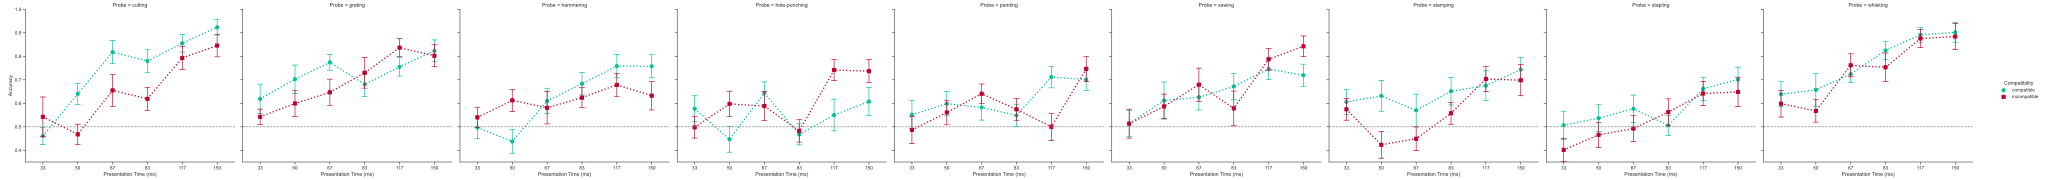

In [15]:
sns.set_theme(style="ticks")
g = sns.catplot(x='PT', y='Accuracy', hue='Compatibility', col='Probe',
                hue_order=['compatible', 'incompatible'],
                data=df_accuracy[df_accuracy.ProbeType == 'Action'],
                palette=ur2,
                kind="point",
                markers=["o", "s"], linestyles='dotted',
                errorbar="se", capsize=.15, errwidth=1.5,
                height=6, aspect=1.2, scale=1.1
                )
g.refline(y=0.5)
g.set(ylim=[0.35, 1])
g.set_axis_labels("Presentation Time (ms)", "Accuracy")
#g.axes[0,0].set_title('Action')
#g.axes[0,1].set_title('Scene')
plt.savefig('plots/accuracy_probes-action.png', dpi=250)
plt.show()

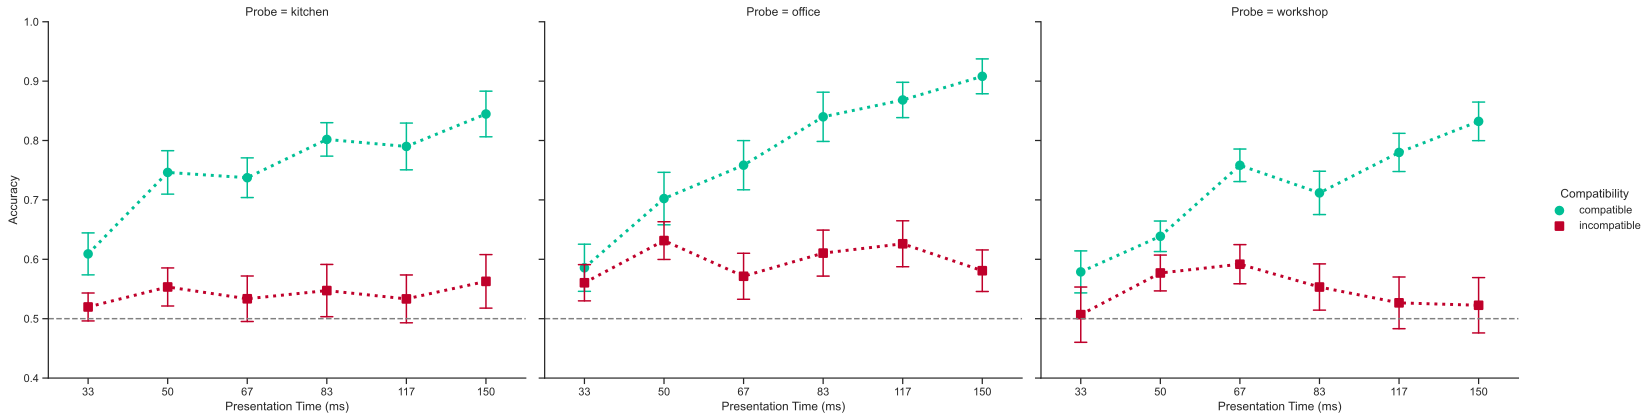

In [13]:
sns.set_theme(style="ticks")
g = sns.catplot(x='PT', y='Accuracy', hue='Compatibility', col='Probe',
                hue_order=['compatible', 'incompatible'],
                data=df_accuracy[df_accuracy.ProbeType == 'Scene'],
                palette=ur2,
                kind="point",
                markers=["o", "s"], linestyles='dotted',
                errorbar="se", capsize=.15, errwidth=1.5,
                height=6, aspect=1.2, scale=1.1
                )
g.refline(y=0.5)
g.set(ylim=[0.4, 1])
g.set_axis_labels("Presentation Time (ms)", "Accuracy")
#g.axes[0,0].set_title('Action')
#g.axes[0,1].set_title('Scene')
plt.savefig('plots/accuracy_probes-scene.png', dpi=250)
plt.show()

All in one

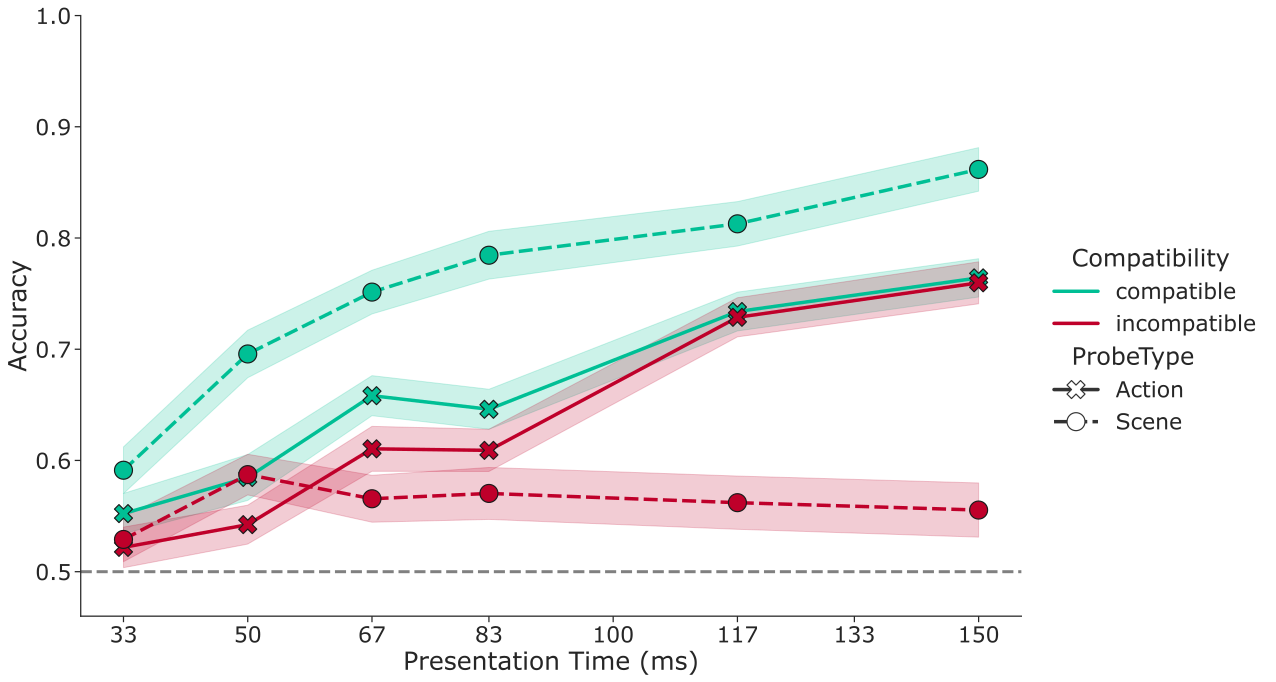

In [10]:
sns.set_theme(style="ticks",
              font='Verdana',
              font_scale=2)

errorbar = 'se' 
fformat = 'svg'
linewidth = 3.5
markersize = 18
plot_legend = True


g = sns.relplot(x='PT', y='Accuracy', hue='Compatibility', style='ProbeType',
                hue_order=['compatible', 'incompatible'],
                data=df_accuracy,
                palette=ur2,
                kind="line",
                #markers=["o", "s"],
                markers=["X", "o"],
                markersize = markersize,
                markeredgecolor='k',
                markeredgewidth=1.2,
                linewidth=linewidth,
                errorbar=errorbar,
                height=10, aspect=1.5,
                legend=plot_legend)
g.refline(y=0.5, linewidth=3)

g.set_axis_labels("Presentation Time (ms)", "Accuracy", size=25)

g.set(xticks=[ 33,  50,  67, 83, 100, 117, 133, 150])

if plot_legend:
    lgnd = g.legend

    lgnd.legend_handles[1].set_linewidth(linewidth)
    lgnd.legend_handles[2].set_linewidth(linewidth)
    lgnd.legend_handles[4].set_linewidth(linewidth)
    lgnd.legend_handles[5].set_linewidth(linewidth)

    lgnd.legend_handles[4].set_markersize(markersize)
    lgnd.legend_handles[5].set_markersize(markersize)

    lgnd.legend_handles[4].set_markeredgewidth(1.2)
    lgnd.legend_handles[5].set_markeredgewidth(1.2)

    lgnd.legend_handles[4].set_markerfacecolor('w')
    lgnd.legend_handles[5].set_markerfacecolor('w')


#plt.suptitle(f'[N={df_summary.subID.max()}]')
g.set(ylim=[0.46, 1])
g.tight_layout()
plt.savefig(f'plots/accuracy_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

## Sensitivity (d-prime)

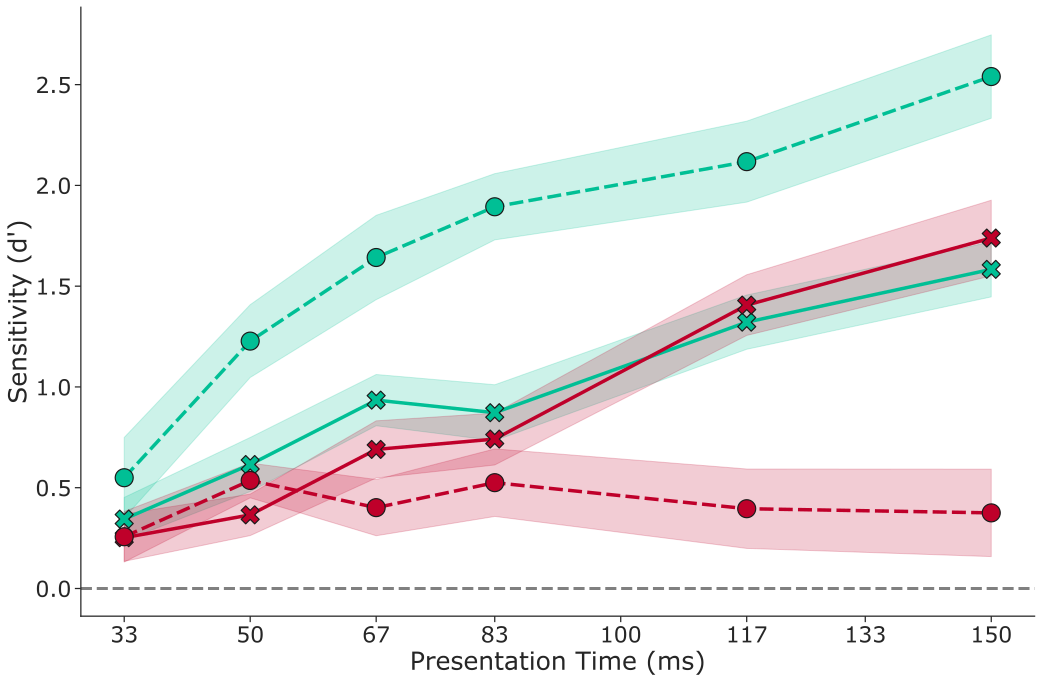

In [16]:
sns.set_theme(style="ticks",
              font='Verdana',
              font_scale=2)

errorbar = 'se' 
fformat = 'svg'
linewidth = 3.5
markersize = 18
plot_legend = False


g = sns.relplot(x='PT', y='dprime', hue='Compatibility', style='ProbeType',
                hue_order=['compatible', 'incompatible'],
                data=df_summary,
                palette=ur2,
                kind="line",
                #markers=["o", "s"],
                markers=["X", "o"],
                markersize = markersize,
                markeredgecolor='k',
                markeredgewidth=1.2,
                linewidth=linewidth,
                errorbar=errorbar,
                height=10, aspect=1.5,
                legend=plot_legend)
g.refline(y=0, linewidth=3)

g.set_axis_labels("Presentation Time (ms)", "Sensitivity (d')", size=25)

g.set(xticks=[ 33,  50,  67, 83, 100, 117, 133, 150])

if plot_legend:
    lgnd = g.legend

    lgnd.legend_handles[1].set_linewidth(linewidth)
    lgnd.legend_handles[2].set_linewidth(linewidth)
    lgnd.legend_handles[4].set_linewidth(linewidth)
    lgnd.legend_handles[5].set_linewidth(linewidth)

    lgnd.legend_handles[4].set_markersize(markersize)
    lgnd.legend_handles[5].set_markersize(markersize)

    lgnd.legend_handles[4].set_markeredgewidth(1.2)
    lgnd.legend_handles[5].set_markeredgewidth(1.2)

    lgnd.legend_handles[4].set_markerfacecolor('w')
    lgnd.legend_handles[5].set_markerfacecolor('w')


#plt.suptitle(f'[N={df_summary.subID.max()}]')
g.tight_layout()
plt.savefig(f'plots/dprime_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

Make legend and plot separately

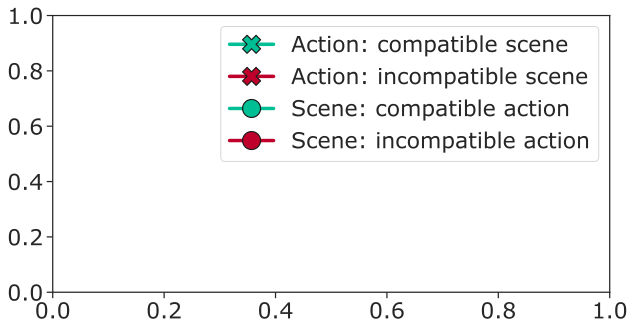

In [17]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(10,5))
lAC = mlines.Line2D([], [], color=colors[0], marker='X',
                    linewidth=linewidth,
                    markersize=markersize,
                    markeredgecolor='k',
                    markeredgewidth=1.2,
                    label='Action: compatible scene')
lAI = mlines.Line2D([], [], color=colors[1], marker='X',
                    linewidth=linewidth,
                    markersize=markersize,
                    markeredgecolor='k',
                    markeredgewidth=1.2,
                    label='Action: incompatible scene')
lSC = mlines.Line2D([], [], color=colors[0], marker='o',
                    linewidth=linewidth,
                    markersize=markersize,
                    markeredgecolor='k',
                    markeredgewidth=1.2,
                    label='Scene: compatible action')
lSI = mlines.Line2D([], [], color=colors[1], marker='o',
                    linewidth=linewidth,
                    markersize=markersize,
                    markeredgecolor='k',
                    markeredgewidth=1.2,
                    label='Scene: incompatible action')


#ax.set_xlim((-3,1.4))
lgnd = ax.legend(handles=[lAC, lAI, lSC, lSI])

fig  = lgnd.figure
fig.canvas.draw()
bbox  = lgnd.get_window_extent()
bbox = bbox.from_extents(*(bbox.extents + np.array([-5,-5,5,5])))
bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
fig.savefig('plots/legend.svg', dpi="figure", bbox_inches=bbox)

#plt.show()

Within context

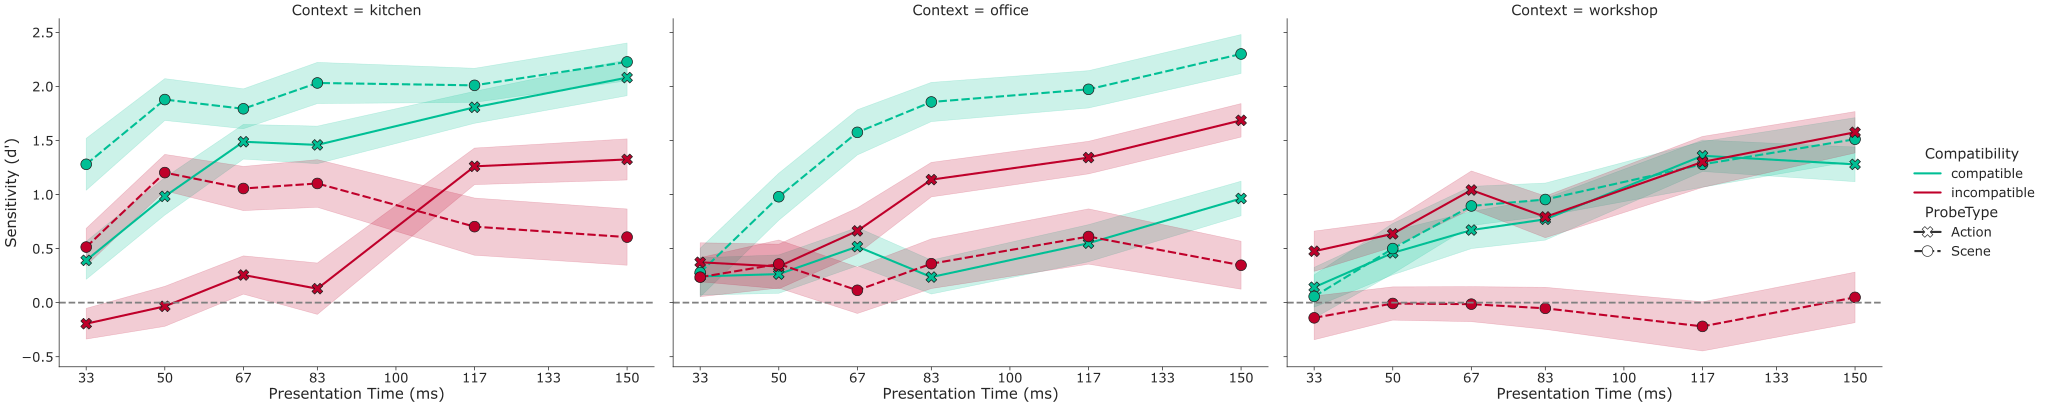

In [18]:
sns.set_theme(style="ticks",
              font='Verdana',
              font_scale=2)

errorbar = 'se' 
fformat = 'svg'
linewidth = 3.5
markersize = 18
plot_legend = True


g = sns.relplot(x='PT', y='dprime', hue='Compatibility', style='ProbeType',
                col='Context',
                col_order=['kitchen', 'office', 'workshop'],
                hue_order=['compatible', 'incompatible'],
                data=df_summary_ctxt,
                palette=ur2,
                kind="line",
                #markers=["o", "s"],
                markers=["X", "o"],
                markersize = markersize,
                markeredgecolor='k',
                markeredgewidth=1.2,
                linewidth=linewidth,
                errorbar=errorbar,
                height=10, aspect=1.5,
                legend=plot_legend)
g.refline(y=0, linewidth=3)

g.set_axis_labels("Presentation Time (ms)", "Sensitivity (d')", size=25)

g.set(xticks=[ 33,  50,  67, 83, 100, 117, 133, 150])

if plot_legend:
    lgnd = g.legend

    lgnd.legend_handles[1].set_linewidth(linewidth)
    lgnd.legend_handles[2].set_linewidth(linewidth)
    lgnd.legend_handles[4].set_linewidth(linewidth)
    lgnd.legend_handles[5].set_linewidth(linewidth)

    lgnd.legend_handles[4].set_markersize(markersize)
    lgnd.legend_handles[5].set_markersize(markersize)

    lgnd.legend_handles[4].set_markeredgewidth(1.2)
    lgnd.legend_handles[5].set_markeredgewidth(1.2)

    lgnd.legend_handles[4].set_markerfacecolor('w')
    lgnd.legend_handles[5].set_markerfacecolor('w')


#plt.suptitle(f'[N={df_summary.subID.max()}]')
g.tight_layout()
#plt.savefig(f'plots/dprime_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

### Distributions

Compatible

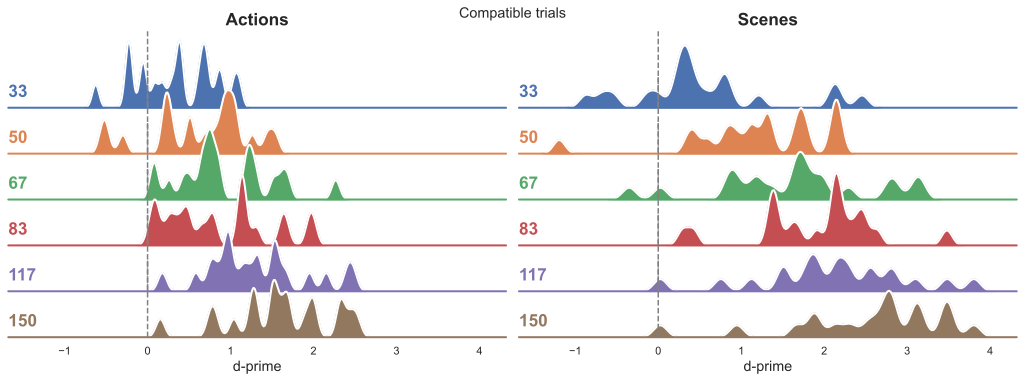

In [21]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_summary[(df_summary.Compatibility == 'compatible')],
                  row="PT", hue="PT",
                  col="ProbeType",
                  col_order=['Action', 'Scene'],
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.16
g.map(sns.kdeplot, "dprime",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "dprime", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='x-large', color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "PT")

# Remove axes details that don't play well with overlap

# Titles
g.set_titles("")
fontdict = {
    'fontsize' : 'x-large',
    'fontweight' : 'bold'
}
g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('d-prime', fontdict)
g.axes[-1, 1].set_xlabel('d-prime', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

g.refline(x=0)

plt.suptitle('Compatible trials')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.4)

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_dprime_AvS_compatible.png', dpi=250)
plt.show()

Incompatible

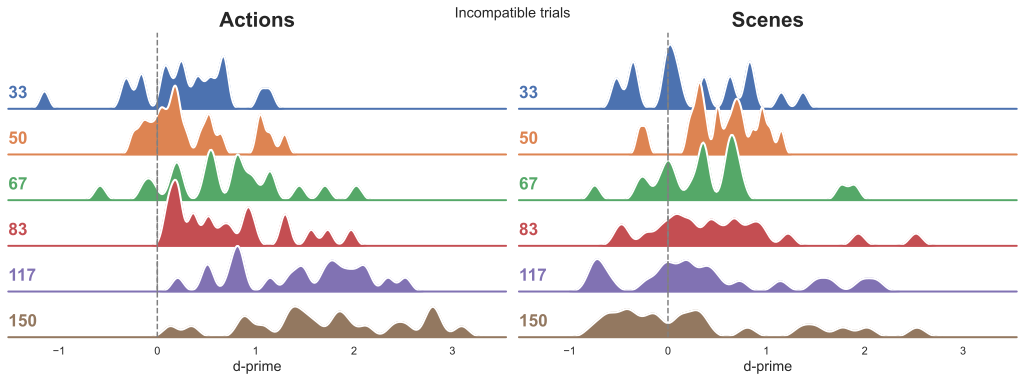

In [22]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_summary[(df_summary.Compatibility == 'incompatible')],
                  row="PT", hue="PT",
                  col="ProbeType",
                  col_order=['Action', 'Scene'],
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.16
g.map(sns.kdeplot, "dprime",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "dprime", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='x-large', color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "PT")

# Remove axes details that don't play well with overlap
g.set_titles("")

fontdict = {
    'fontsize' : 'xx-large',
    'fontweight' : 'bold'
}

g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('d-prime', fontdict)
g.axes[-1, 1].set_xlabel('d-prime', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

g.refline(x=0)

plt.suptitle('Incompatible trials')
plt.xlabel('d-prime')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.4)

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_dprime_AvS_incompatible.png', dpi=250)
plt.show()

Individuals

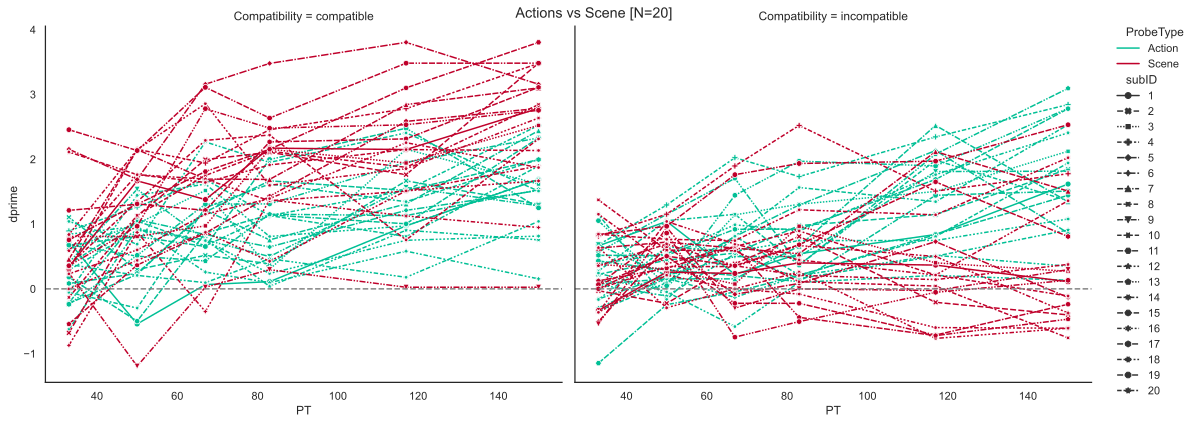

In [23]:
g = sns.relplot(x='PT', y='dprime', hue='ProbeType', style='subID', col='Compatibility',
                data=df_summary,
                palette=ur2,
                markers=True,
                kind='line', height=6, aspect=1.3,
                errorbar='se'
                )
g.refline(y=0)
g.tight_layout()
plt.suptitle(f'Actions vs Scene [N={df_summary.subID.max()}]')
plt.savefig('plots/dprime_individuals_compatibility.png', dpi=250)
plt.show()

## Reaction Time

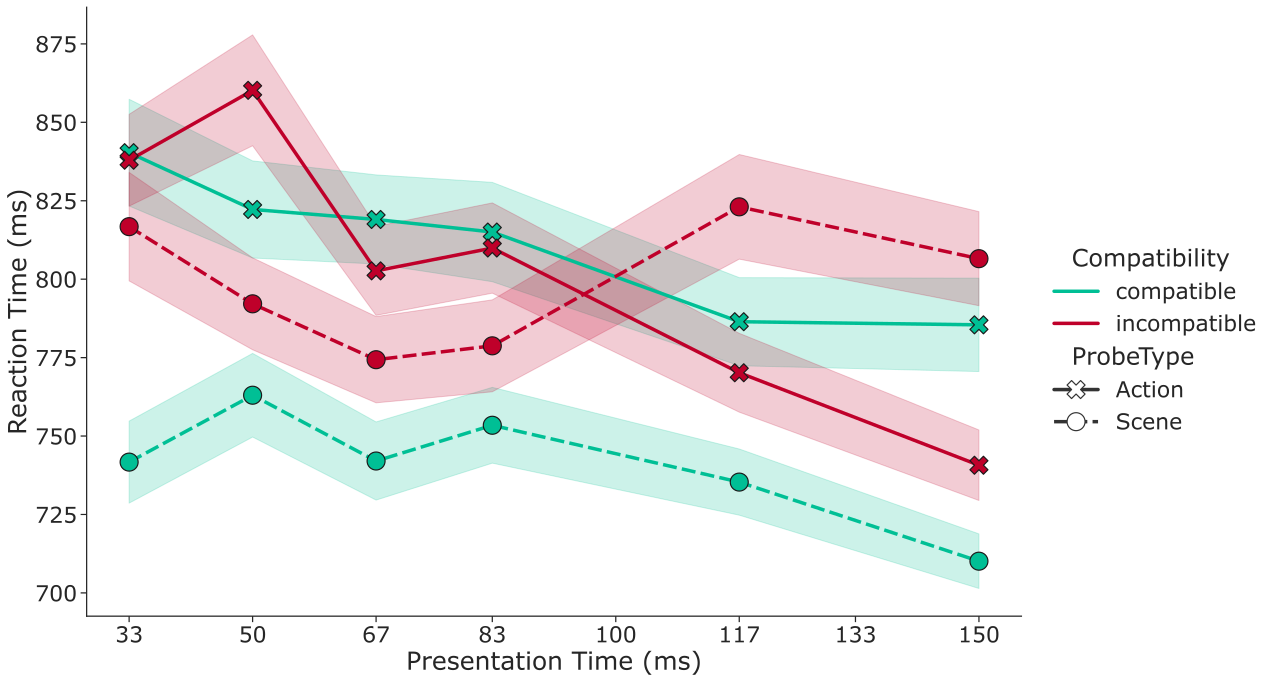

In [28]:
sns.set_theme(style="ticks",
              font='Verdana',
              font_scale=2)

errorbar = 'se' 
fformat = 'svg'
linewidth = 3.5
markersize = 18
plot_legend = True

g = sns.relplot(x='PT', y='RT', hue='Compatibility', style='ProbeType',
                hue_order=['compatible', 'incompatible'],
                data=df_trials[df_trials.CorrectResponse == df_trials.Response],
                palette=ur2,
                kind="line",
                markers=["X", "o"],
                markersize = 18,
                markeredgecolor='k',
                markeredgewidth=1.2,
                linewidth=3.5,
                errorbar=errorbar,
                height=10, aspect=1.5,
                legend=plot_legend)

if plot_legend:
    lgnd = g.legend

    lgnd.legend_handles[1].set_linewidth(linewidth)
    lgnd.legend_handles[2].set_linewidth(linewidth)
    lgnd.legend_handles[4].set_linewidth(linewidth)
    lgnd.legend_handles[5].set_linewidth(linewidth)

    lgnd.legend_handles[4].set_markersize(markersize)
    lgnd.legend_handles[5].set_markersize(markersize)

    lgnd.legend_handles[4].set_markeredgewidth(1.2)
    lgnd.legend_handles[5].set_markeredgewidth(1.2)

    lgnd.legend_handles[4].set_markerfacecolor('w')
    lgnd.legend_handles[5].set_markerfacecolor('w')

g.set_axis_labels("Presentation Time (ms)", "Reaction Time (ms)", size=25)

g.set(xticks=[ 33,  50,  67, 83, 100, 117, 133, 150])

g.tight_layout()
plt.savefig(f'plots/rt_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

Per context

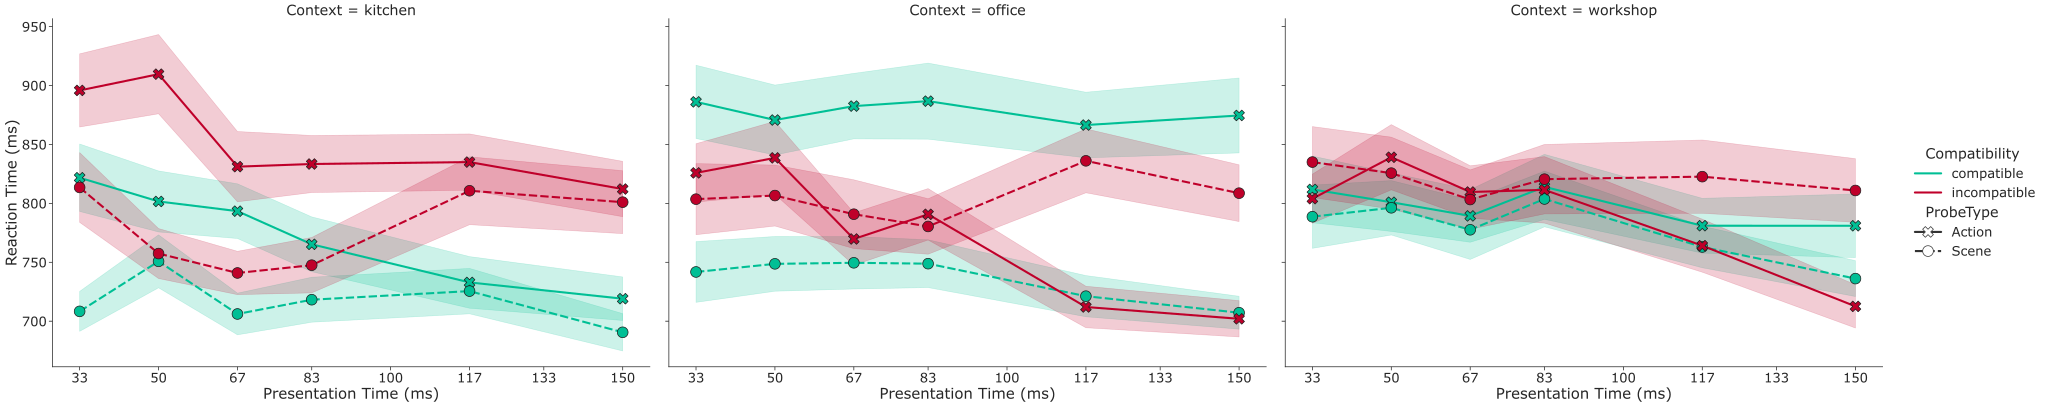

In [30]:
sns.set_theme(style="ticks",
              font='Verdana',
              font_scale=2)

errorbar = 'se' 
fformat = 'svg'
linewidth = 3.5
markersize = 18
plot_legend = True


g = sns.relplot(x='PT', y='RT', hue='Compatibility', style='ProbeType',
                col='Context',
                col_order=['kitchen', 'office', 'workshop'],
                hue_order=['compatible', 'incompatible'],
                data=df_trials[df_trials.CorrectResponse == df_trials.Response],
                palette=ur2,
                kind="line",
                #markers=["o", "s"],
                markers=["X", "o"],
                markersize = markersize,
                markeredgecolor='k',
                markeredgewidth=1.2,
                linewidth=linewidth,
                errorbar=errorbar,
                height=10, aspect=1.5,
                legend=plot_legend)

g.set_axis_labels("Presentation Time (ms)", "Reaction Time (ms)", size=25)

g.set(xticks=[ 33,  50,  67, 83, 100, 117, 133, 150])

if plot_legend:
    lgnd = g.legend

    lgnd.legend_handles[1].set_linewidth(linewidth)
    lgnd.legend_handles[2].set_linewidth(linewidth)
    lgnd.legend_handles[4].set_linewidth(linewidth)
    lgnd.legend_handles[5].set_linewidth(linewidth)

    lgnd.legend_handles[4].set_markersize(markersize)
    lgnd.legend_handles[5].set_markersize(markersize)

    lgnd.legend_handles[4].set_markeredgewidth(1.2)
    lgnd.legend_handles[5].set_markeredgewidth(1.2)

    lgnd.legend_handles[4].set_markerfacecolor('w')
    lgnd.legend_handles[5].set_markerfacecolor('w')


#plt.suptitle(f'[N={df_summary.subID.max()}]')
g.tight_layout()
#plt.savefig(f'plots/dprime_all-in-one_{errorbar}.{fformat}', dpi=250)
plt.show()

Action vs Scene: Compatible & correct trials

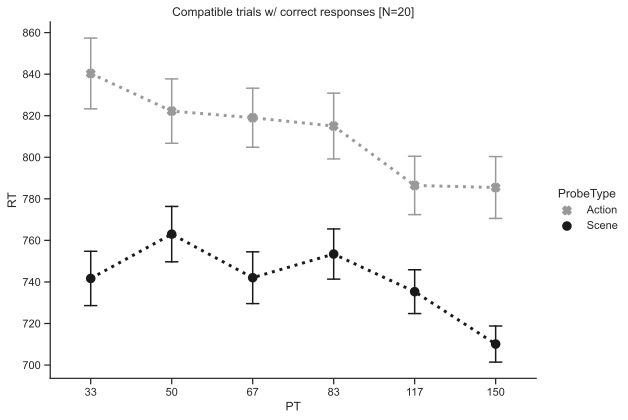

In [38]:
sns.set_theme(style="ticks")
g = sns.catplot(x='PT', y='RT', hue='ProbeType',
                hue_order=['Action', 'Scene'],
                data=df_trials[
                    (df_trials.Compatibility == 'compatible') &
                    (df_trials.CorrectResponse == df_trials.Response)],
                palette=['0.6', 'k'],
                kind="point",
                markers=["X", "o"],
                linestyles='dotted',
                errorbar="se", capsize=.15, errwidth=1.5,
                height=6, aspect=1.3, scale=1.1
                )
g.axes[0,0].set_title(f'Compatible trials w/ correct responses [N={df_trials.subID.max()}]')
g.tight_layout()
plt.savefig('plots/rt_compatible&correct.png', dpi=250)
plt.show()

Distributions

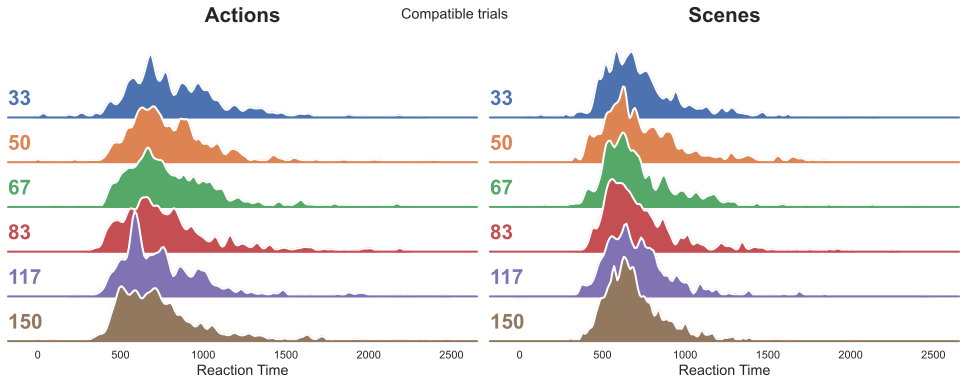

In [39]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_trials[(df_trials.Compatibility == 'compatible')  &
                               (df_trials.CorrectResponse == df_trials.Response)],
                  col_order=['Action', 'Scene'],
                  row="PT", hue="PT",
                  col="ProbeType",
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.18
g.map(sns.kdeplot, "RT",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "RT", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='xx-large', color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "PT")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)


# Remove axes details that don't play well with overlap
g.set_titles("")

fontdict = {
    'fontsize' : 'xx-large',
    'fontweight' : 'bold'
}
g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('Reaction Time', fontdict)
g.axes[-1, 1].set_xlabel('Reaction Time', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.suptitle('Compatible trials')

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_rt_AvS_compatible.png', dpi=250)
plt.show()

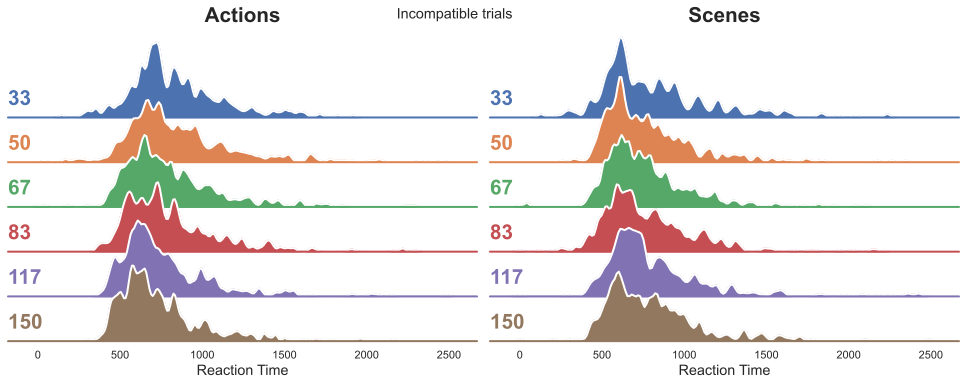

In [40]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
g = sns.FacetGrid(df_trials[(df_trials.Compatibility == 'incompatible')  &
                               (df_trials.CorrectResponse == df_trials.Response)],
                  col_order=['Action', 'Scene'],
                  row="PT", hue="PT",
                  col="ProbeType",
                  aspect=8, height=.9)

# Draw the densities in a few steps
factor = 0.18
g.map(sns.kdeplot, "RT",
      bw_adjust=factor, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "RT", clip_on=False, color="w", lw=2, bw_adjust=factor)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize='xx-large', color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "PT")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)


# Remove axes details that don't play well with overlap
g.set_titles("")

fontdict = {
    'fontsize' : 'xx-large',
    'fontweight' : 'bold'
}

g.axes[0, 0].set_title('Actions', fontdict)
g.axes[0, 1].set_title('Scenes', fontdict)

# x-label
fontdict = {'fontsize' : 'large'}
g.axes[-1, 0].set_xlabel('Reaction Time', fontdict)
g.axes[-1, 1].set_xlabel('Reaction Time', fontdict)

g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.suptitle('Incompatible trials')

# Define and use a simple function to label the plot in axes coordinates
g.savefig('plots/distrib_rt_AvS_incompatible.png', dpi=250)
plt.show()

Individuals

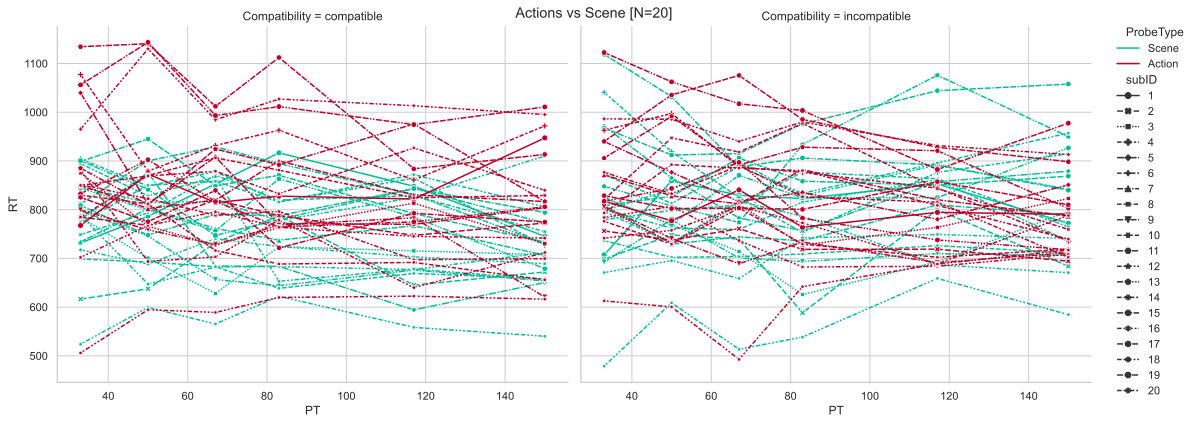

In [43]:
g = sns.relplot(x='PT', y='RT', hue='ProbeType', style='subID', col='Compatibility',
                data=df_trials,
                palette=ur2,
                markers=True,
                kind='line', height=6, aspect=1.3,
                errorbar=None
                )
g.tight_layout()
plt.suptitle(f'Actions vs Scene [N={df_summary.subID.max()}]')
plt.savefig('plots/rt_individuals_compatibility.png', dpi=250)
plt.show()

## Speed-accuracy trade-off

### RT-d' correlation

Measure the speed-accuracy trade-off within probe type and PT, by correlating the sensitivity with reaction time.

Similar to Bacon-Mace et al. (2007):
>*For each SOA condition, the Pearson correlation was calculated between the mean accuracy and the mean reaction time of each participant. Each bar thus represents a correlation index that takes into account as many points as there are participants in a given experiment.*

In [21]:
df_summary

,Unnamed: 0,subID,PT,Compatibility,ProbeType,n_hits,n_falarms,n_correjections,n_misses,dprime
0,0,1,33,compatible,Action,2,0,18,15,0.727674
1,1,1,33,compatible,Scene,5,3,14,13,0.339444
2,2,1,33,incompatible,Action,3,1,17,14,0.664319
3,3,1,33,incompatible,Scene,2,3,13,16,-0.333494
4,4,1,50,compatible,Action,4,7,10,14,-0.541702
...,...,...,...,...,...,...,...,...,...,...
475,475,20,117,incompatible,Scene,11,4,14,6,1.142102
476,476,20,150,compatible,Action,12,3,15,5,1.508817
477,477,20,150,compatible,Scene,12,1,17,5,2.134614
478,478,20,150,incompatible,Action,15,1,16,3,2.532148


In [45]:
a_sub      = np.unique(df_trials.subID)
a_prestime  = np.unique(df_trials.PT)
a_comp      = np.unique(df_trials.Compatibility)
a_ptype     = np.unique(df_trials.ProbeType)
l_meanRT = []

# Iterate over subjects
for i in tqdm(range(len(a_sub))):
    subID = a_sub[i]
    # Iterate over Probe Type
    for j in range(len(a_ptype)):
        ptype = a_ptype[j]
        # Iterate over Compatibility
        for k in range(len(a_comp)):
            compatibility = a_comp[k]
            # Iterate over PT
            for l in range(len(a_prestime)):
                prestime = a_prestime[l]
                rt_mean = df_trials[
                            (df_trials.subID == subID) & 
                            (df_trials.ProbeType == ptype) &
                            (df_trials.Compatibility == compatibility) &
                            (df_trials.PT == prestime)
                            ].groupby([
                                'subID', 'ProbeType','Compatibility','PT'
                                ]).mean('RT').RT.values[0]
                l_meanRT.append([subID, ptype, compatibility, prestime, rt_mean])
                
df_meanRT = pd.DataFrame(l_meanRT,
                         columns=['subID', 'ProbeType', 'Compatibility', 'PT', 'meanRT'])
df_summary_rt = df_summary.merge(df_meanRT).drop([
    'n_hits', 'n_falarms', 'n_correjections', 'n_misses'], axis=1)
df_summary_rt

100%|██████████| 20/20 [00:01<00:00, 14.09it/s]


,Unnamed: 0,subID,PT,Compatibility,ProbeType,dprime,meanRT
0,0,1,33,compatible,Action,0.727674,767.622857
1,1,1,33,compatible,Scene,0.339444,731.671429
2,2,1,33,incompatible,Action,0.664319,817.451429
3,3,1,33,incompatible,Scene,-0.333494,707.294118
4,4,1,50,compatible,Action,-0.541702,873.211429
...,...,...,...,...,...,...,...
475,475,20,117,incompatible,Scene,1.142102,895.988571
476,476,20,150,compatible,Action,1.508817,839.742857
477,477,20,150,compatible,Scene,2.134614,805.662857
478,478,20,150,incompatible,Action,2.532148,739.654286


In [46]:
df_corrs = df_summary_rt.groupby(['PT', 'Compatibility', 'ProbeType']).corr('pearson')
df_corrs = df_corrs.reset_index(
    [0,1,2]).drop(
        ['subID', 'meanRT'], axis=0).drop(
            ['dprime', 'subID'], axis=1).rename(columns={'meanRT' : 'corr'})
df_corrs

,PT,Compatibility,ProbeType,Unnamed: 0,corr
Unnamed: 0,33,compatible,Action,1.000000,-0.212659
dprime,33,compatible,Action,-0.183047,0.028907
Unnamed: 0,33,compatible,Scene,1.000000,0.011211
dprime,33,compatible,Scene,0.350334,0.307821
Unnamed: 0,33,incompatible,Action,1.000000,-0.099294
dprime,33,incompatible,Action,0.165242,-0.144929
Unnamed: 0,33,incompatible,Scene,1.000000,-0.020489
dprime,33,incompatible,Scene,0.230529,0.288120
Unnamed: 0,50,compatible,Action,1.000000,0.008306
dprime,50,compatible,Action,-0.067738,-0.155480


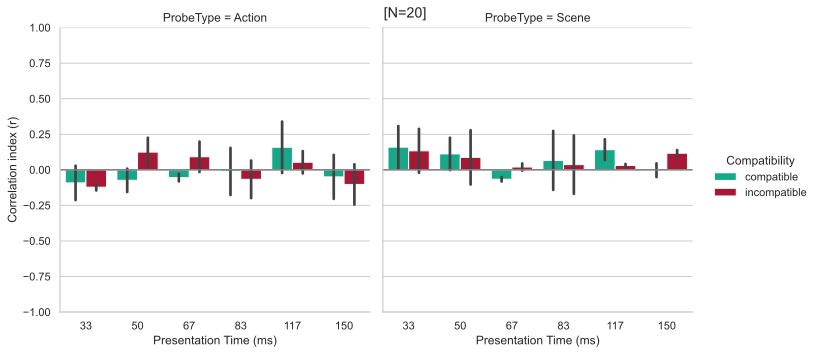

In [47]:
g = sns.catplot(data=df_corrs,
                x='PT', y="corr", hue="Compatibility", col='ProbeType',
                palette=ur2,
                kind="bar")

g.set(ylim = (-1, 1))
g.refline(y=0, linestyle='solid')
g.set_xlabels('Presentation Time (ms)')
g.set_ylabels('Correlation index (r)')
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig('plots/correlation_speed-accuracy-tradeoff.png', dpi=250)
plt.show()

### Inverse efficiency (RT / d’)

In [48]:
df_summary_rt['IES'] = df_summary_rt.meanRT / df_summary_rt.dprime

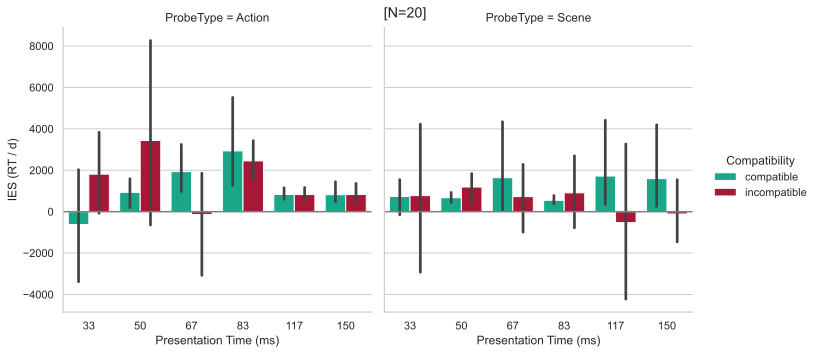

In [49]:
df_ies = df_summary_rt.copy(deep=True)
df_ies = df_ies.replace([np.inf, -np.inf], np.nan)
df_ies.dropna(inplace=True)

g = sns.catplot(data=df_ies,
                x='PT', y="IES", hue="Compatibility", col='ProbeType',
                palette=ur2,
                kind="bar")

#g.set(ylim = (-1, 1))
g.refline(y=0, linestyle='solid')
g.set_xlabels('Presentation Time (ms)')
g.set_ylabels('IES (RT / d'')')
plt.suptitle(f'[N={df_summary.subID.max()}]')
plt.savefig('plots/speed-accuracy-tradeoff_inverse-efficiency.png', dpi=250)
plt.show()